# Prediction of Cardiovascular Diseases Using Machine Learning Classification Models

### Importing necessary packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

### Convert the ages from number of days to categorical values 

In [224]:
# Age is given in days. Transforming it into years for better understanding and checking relation with the target variable.
def calculate_age(days):
  days_year = 365.2425
  age = int(days // days_year)
  return age
cardio['age'] = cardio['age'].apply(lambda x: calculate_age(x))

In [225]:

cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


### Distribution of Age on CVD

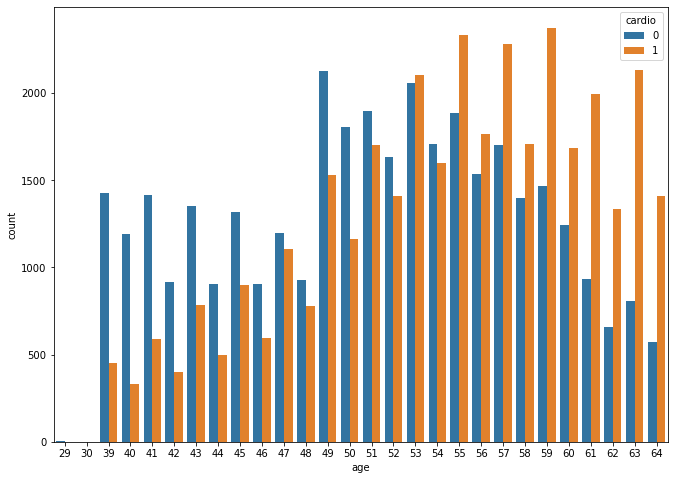

In [226]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

sns.countplot(x='age', hue='cardio', data = cardio);

From this visual we can assume that people who are 55 greater in age are more exposed to CVD.

###  CVD distribution on Gender 

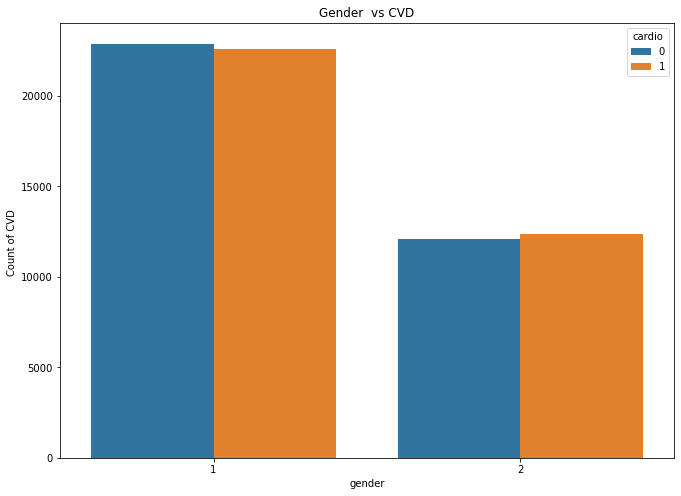

In [227]:
sns.countplot(x='gender', data=cardio, hue='cardio')
plt.ylabel("Count of CVD ")
plt.title('Gender  vs CVD')
plt.show()


Not much of a difference between females (1) and males (2) and the chance of getting cardiovascular disease.

###  CVD Distribution on Height and Weight 

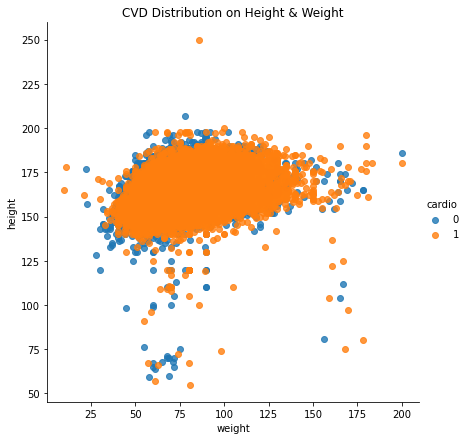

In [228]:
sns.lmplot(x='weight', y='height', hue='cardio', data=cardio, fit_reg=False, height=6)
plt.title('CVD Distribution on Height & Weight')
plt.show()

Features like Weight and Height are well distribuited for Non - CVD and CVD Population.There is nothing much diffrence.

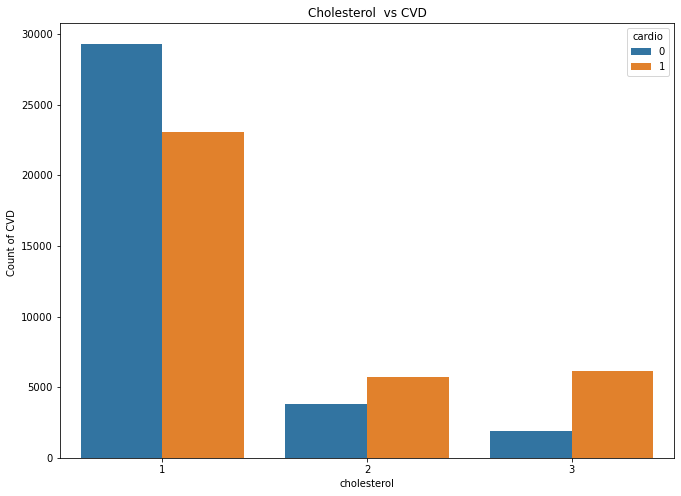

In [229]:
sns.countplot(x='cholesterol', hue='cardio', data=cardio)
plt.ylabel("Count of CVD ")
plt.title('Cholesterol  vs CVD')
plt.show()

## Feature Engineering 

## Analysisng the Risk Factors of CVD

### BMI Analysis

Body Mass Index (BMI) is a common metric used for medical evaluation and heart health
BMI can be calculated by the following: BMI = weight(kg) / height (cm) / height (cm) x 10,000



In [230]:
# calculate the BMI score 
cardio['BMI'] = cardio['weight']/((cardio['height']/100)**2)
#cardio['pulse pressure'] = cardio['systolic'] - cardio['diastolic']
cardio.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56,100,60,1,1,0,0,0,0,23.011177


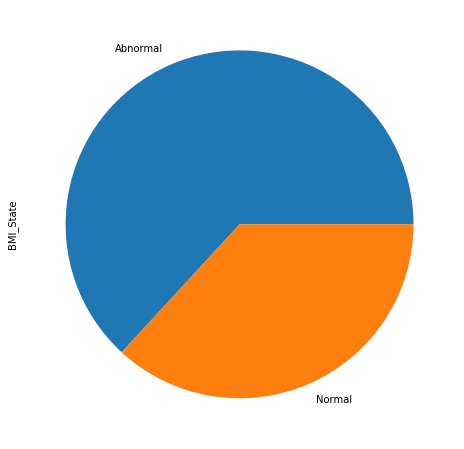

In [231]:
# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

cardio["BMI_State"] = cardio['BMI'].apply(lambda x: bmi_categorize(x))
cardio["BMI_State"].value_counts().plot(kind='pie')


The majority of our patients are abnormal .

Also we need to check how many of them cvd if they have abnormal bmi score.



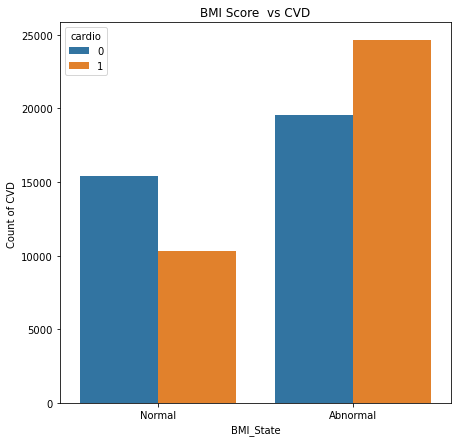

In [232]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='BMI_State', hue='cardio', data = cardio);
plt.ylabel("Count of CVD ")
plt.title('BMI Score  vs CVD')
plt.show()

This one gave a valuable insight stating that people who follows normal BMI score are less prone to CVD and people with 
abnormal BMI are having increasing CVD.

## Blood Pressure Category Analysis

Blood Pressure (BP).Blood pressure is the pressure of circulating blood on the walls of blood vessels. Most of this pressure is due to work done by the heart by pumping blood through the circulatory system.Blood pressure is recorded as two numbers:

Systolic blood pressure (the first number) – indicates how much pressure your blood is exerting against your artery walls when the heart beats.
Diastolic blood pressure (the second number) – indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. 

In [233]:
def categorize_blood_pressure(x):
  if x['ap_hi'] < 120 and x['ap_lo'] < 80:
    return "Normal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] < 80:
    return "Elevated"
  elif 130 <= x['ap_hi'] <= 139 or 80 <= x['ap_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hypertensive Crisis"

# remove outliers
out_filter = ((cardio["ap_hi"]>250) | (cardio["ap_hi"]>250) | (cardio["ap_lo"]>200) )
cardio= cardio[~out_filter]
# categorizing blood pressure
cardio['blood_category'] = cardio.apply(categorize_blood_pressure, axis=1)
 
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_State,blood_category
id,,,,,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,Normal,High Blood Pressure(Stage 1)
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,Abnormal,High Blood Pressure(Stage 2)
2,51,1,165,64,130,70,3,1,0,0,0,1,23.507805,Normal,High Blood Pressure(Stage 1)
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,Abnormal,High Blood Pressure(Stage 2)
4,47,1,156,56,100,60,1,1,0,0,0,0,23.011177,Normal,Normal


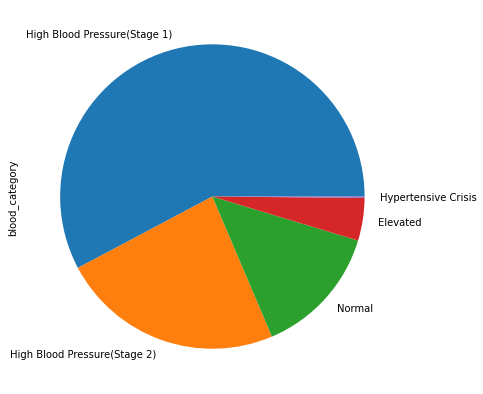

In [234]:
# Visulization of blood pressure category
cardio["blood_category"].value_counts().plot(kind='pie')

Most of them are in elevated condition followed by stage 2 and normal.

Let us see which are the categories are mostly suffering from cardio disease.

C:\Users\rpriy\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


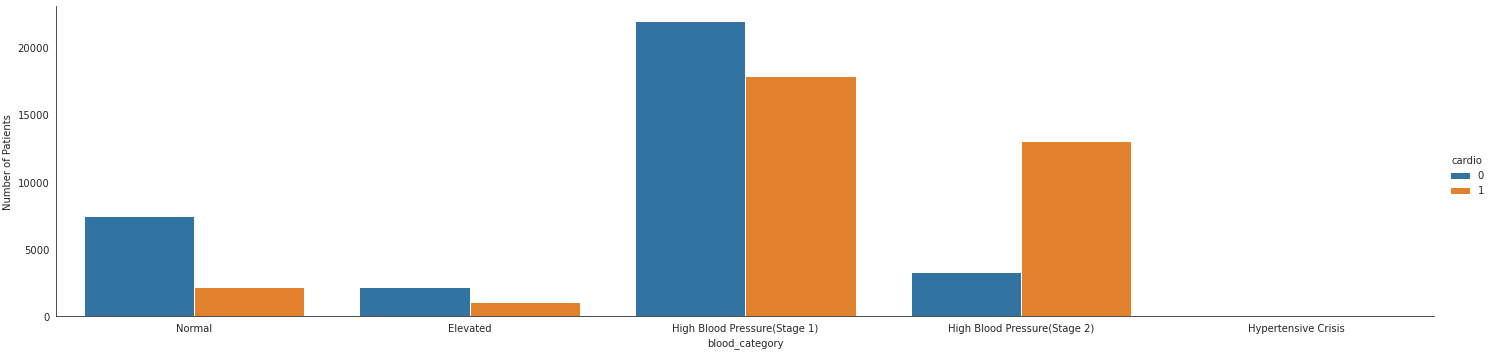

In [235]:
with sns.axes_style('white'):
    g = sns.factorplot("blood_category", data=cardio, aspect=4.0, kind='count',
                       hue='cardio', order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Number of Patients')


This visualization clearing stating that high blood pressure stage 2 are prone to cardio disease . Blood pressure  is highly 
correlating with the target variable "cardio".

## Cholesterol Level Analysis

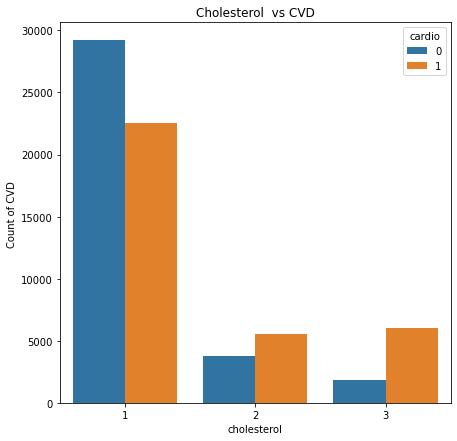

In [236]:
sns.countplot(x='cholesterol', hue='cardio', data=cardio)
plt.ylabel("Count of CVD ")
plt.title('Cholesterol  vs CVD')
plt.show()

The patients who are having above normal & well above normal are the highest risk patient for CVD compare to the normal 
level cholestrol patients

## Glucose Levels 

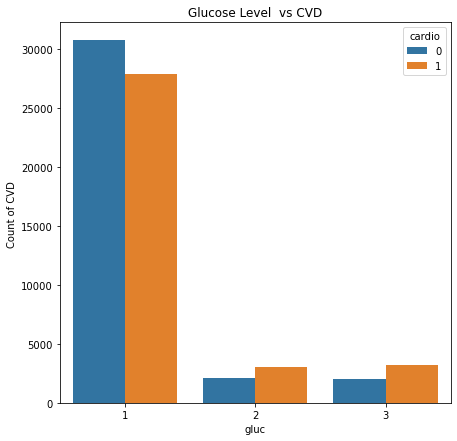

In [237]:
sns.countplot(x='gluc', hue='cardio', data=cardio)
plt.ylabel("Count of CVD ")
plt.title('Glucose Level  vs CVD')
plt.show()

This shows most are maintaining normal glucose level and abnormal patients have high risk to CVD.

## Alcholic Consumption 

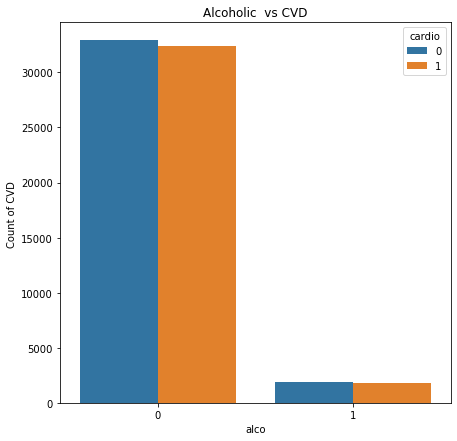

In [238]:
sns.countplot(x='alco', hue='cardio', data=cardio)
plt.ylabel("Count of CVD ")
plt.title('Alcoholic  vs CVD')
plt.show()

By plots and dataset given , alcohol consumption does not seem to be contributing feature to cardio disease classification. 
If alcohol consumption seems to be factor it should have high cardio disease count.

## Smoking Habit

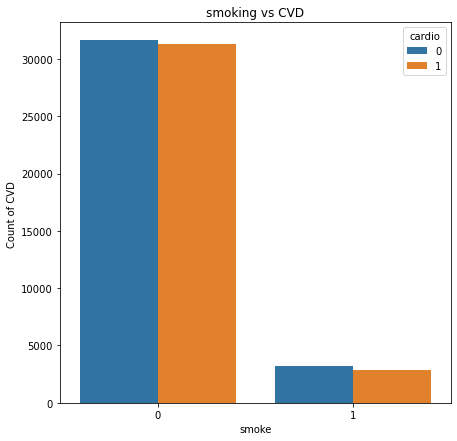

In [239]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='smoke', hue='cardio', data = cardio);
plt.ylabel("Count of CVD ")
plt.title('smoking vs CVD')
plt.show()

One thing to observe is , the non smokers are somewhat more prone to cardio disease compare to smoking person with non cardio 
disease. May be the dataset seem to be polluted.



## Physical Activity Analysis

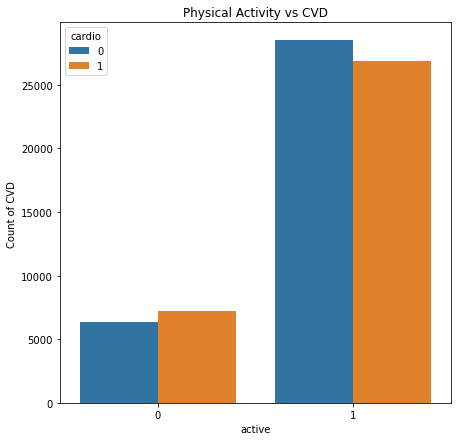

In [240]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='active', hue='cardio', data = cardio);
plt.ylabel("Count of CVD ")
plt.title('Physical Activity vs CVD')
plt.show()

physically active people are not prone to cardio disease comparing to physicall active people suffers from cardio disease.

## Multivariate analysis

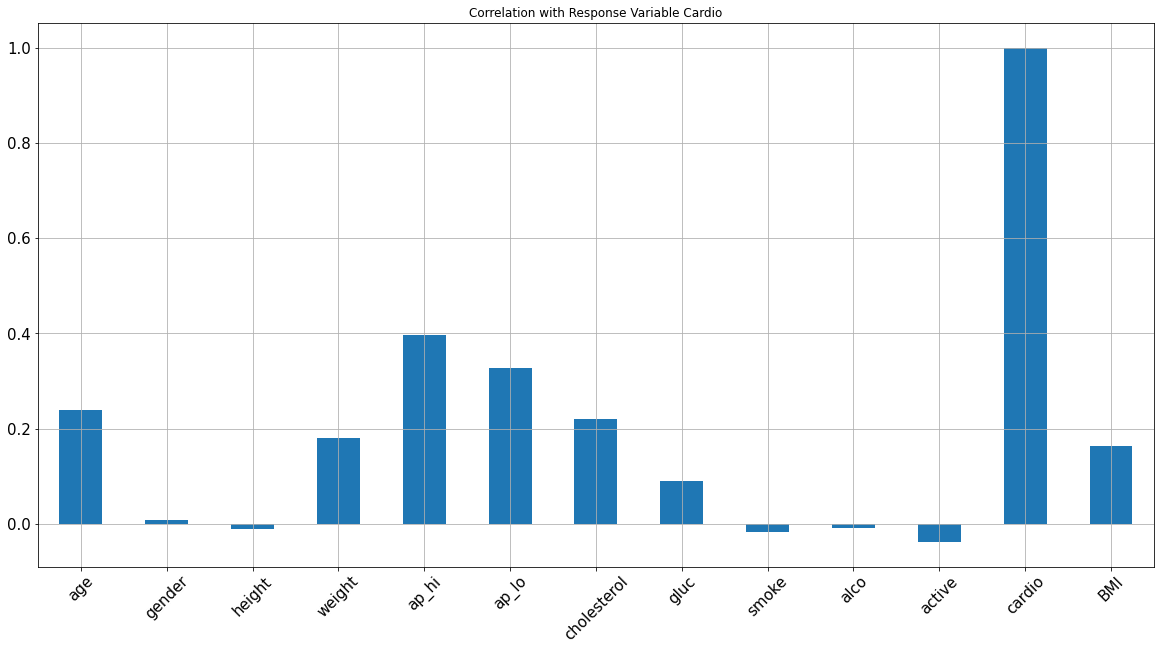

In [241]:
cardio.corrwith(cardio.cardio).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable Cardio', 
                                   fontsize = 15, rot = 45, grid = True)

**Correlation matrix**

(13.5, -0.5)

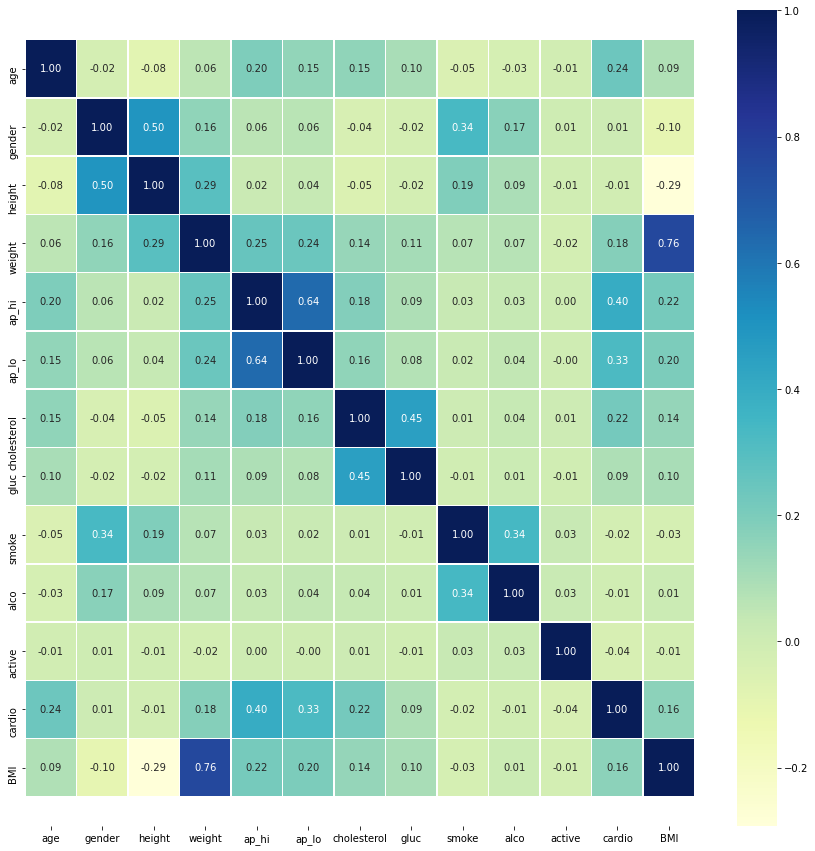

In [242]:
corr_matrix = cardio.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)